In [1]:
#Импорт библиотеки func.py (служебное название)
from func import *

#Построение графиков сразу в Jupiter Notebook
%matplotlib inline

In [2]:
api = tw_oauth('./auth.k') #Подключение Twitter Api
conn = sqlite3.connect('twi.db') # Подключение БД
dbname = 'vtbrussia' #Имя БД

In [3]:
#Поиск твиттов по теме (на выходе список ИД)
tw_search(api, 'vtbrussia.ru', count = 5)

[789002504751099904,
 788166271967854592,
 787762189461495808,
 787716034442752009,
 787663058168639488,
 786542833842921473]

In [4]:
#Создание БД для Твиттов
createbd(conn, dbname, recreate = True)
#Создание БД для Твиттов

In [4]:
#Поиск твиттов по теме и добавление списка ИД новых твиттов в БД
tw_search_and_add(api, 'vtbrussia.ru', conn, dbname, pres = True)
#Поиск твиттов по теме и добавление списка ИД новых твиттов в БД

Добавлено  2  новых твиттов


In [5]:
#Добавление списка произвольных твиттов в БД
twidlist = [790561927625838592, 790450069594107904, 789660021734907904, 789002504751099904,
            788166271967854592, 787762189461495808, 787716034442752009, 787663058168639488, 786542833842921473,
            785766011240755200, 785560628027068416, 784426314476490752, 784119086011809792, 783928319108579328, 
            783916691214532608, 782834504570376192, 782660484596133888, 781985168735297537, 781965512473468932, 
            781842704497946625, 781832872919433216, 781832853772460032, 781832759631351808, 781831407505145856,
            781677505245700096, 781641528976420864, 781639928941649920, 781370383484280832, 781204170330214400,
            781167226707673088, 780773825915023360, 779266581931159552, 778952031017074688, 778642326210088960,
            777954040898543616, 777837310201257984, 776005576761409537, 775691390659469312, 774954021132042240,
            773870069478723584, 773145551823052800, 773139431914102784, 772410985034424320, 772409445292867584,
            772407486049648640, 772405979627589632, 772404187275595776, 772391541432258561, 772377833268281344,
            772375271919984640, 772373860905783296, 772079349151457281, 771706120507367424, 770327785642532866,
            769720447466438656, 769616231875747840, 769615970801364992, 768771973426057216, 768764161476202496,
            768634669755752448, 767848656686964783, 767267019041497088, 766317097806917632, 766011711539318784,
            764923653859348480, 764707628354248704, 764225359781003264, 764116460683857920, 763335742978453504,
            763333731889385472, 763328178567933953, 762944819173920768, 762898413587488768, 762578878342782976,
            762229602320261120, 761794853088923648, 761793607862980608, 761791222562390016, 761640127860998144,
            761233684162805764, 760580959028805636, 760580418936725504, 760568917433737216, 760487671663828997,
            760163347245457408, 760163030932000768, 760140590034067456, 759888337943408644, 759336816495431680,
            758753688286617600, 758286949274845184, 758286788003790848, 758202503620136960, 757563234715070464,
            757508226434891776, 756934641660076032, 756739119032758272, 756738856263770113, 756508575904755712,
            756000721624002560, 755821012399382528, 755391806314057728, 755331823123791872, 754182809942622208,
            752872244272136192, 752152918678208513, 751347387780698112, 750434884301316097, 750288900174807040,
            749919520387637248, 749897337858826240, 749896322052947968, 749791653125197824, 749727824915857412,
            748778854634835968, 747980371917152256, 747896618431692800, 746770174108381185, 746670360754589696,
            746130172001292292, 745888800119853056, 744443208655044608, 743881596219101184, 743880892251267072,
            742744236118933504, 741516141454102528, 741513917239853056, 740831697994911744, 740531518217523201,
            740525495687729156, 740428721757278208, 740394829193052163, 740061226105999360]
addTwIdtoDB(conn, dbname, twidlist)
#Добавление списка произвольных твиттов в БД

In [6]:
#Добавление полной twitter информации в БД по поиску Twitter API для списка ID
tw_info_add(api, twidlist, conn, dbname, domain = 'vtbrussia.ru')
#Добавление полной twitter информации в БД по поиску Twitter API для списка ID

{'tech': 1, 'bitrix': 2, 'shared': 4, 'culture': 3, 'sport': 0}
[[6, 8, 4, 10, 12, 1, 6], [9, 11, 13, 9, 6, 14, 16], [1, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 0, 0]]
['sport', 'tech', 'bitrix', 'culture', 'shared']


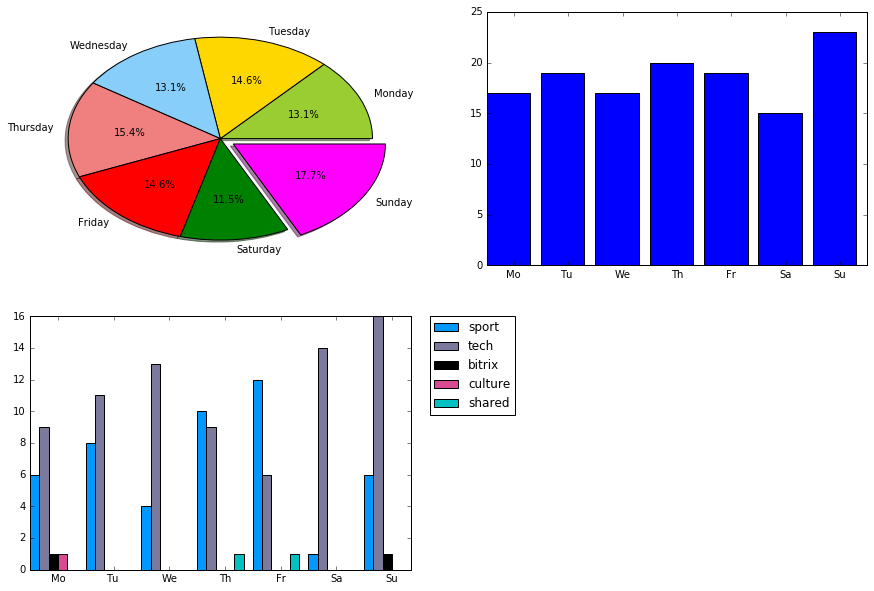

In [7]:
#Построение гистограмм числа твитов по дням недели (за всё время)
graph_tw_days_full(conn, dbname)
#Построение гистограмм числа твитов по дням недели (за всё время)

In [8]:
#Закрытие подключения к БД!
conn.close()
#Закрытие подключения к БД!